In [1]:
import numpy as np 
import pandas as pd 
import os, gc
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')
test_transaction =pd.read_csv('test_transaction.csv')
print('Train Identity Data - rows:', train_identity.shape[0], 
      'columns:', train_identity.shape[1])
print('Train Transaction Data - rows:', train_transaction.shape[0], 
      'columns:', train_transaction.shape[1])
print('Test Identity Data - rows:', test_identity.shape[0], 
      'columns:', test_identity.shape[1])
print('Test Transaction Data - rows:', test_transaction.shape[0], 
      'columns:', test_transaction.shape[1])

Train Identity Data - rows: 144233 columns: 41
Train Transaction Data - rows: 590540 columns: 394
Test Identity Data - rows: 141907 columns: 41
Test Transaction Data - rows: 506691 columns: 393


In [3]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,...,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,...,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
def column_properties(df):
    columns_prop = pd.DataFrame()
    #membuat daftar dan meletakan semua kolom pada daftar
    columns_prop['column'] = df.columns.tolist()
    
    #menghitung baris yang tidak memiliki nilai 0 pada kolom tertentu
    columns_prop['count_non_null'] = df.count().values
    
    #melihat semua nilai 0 dan menambahkan itunganya bukan nol
    columns_prop['count_null'] = df.isnull().sum().values
    columns_prop['perc_null'] = columns_prop['count_null'] * 100 / df.shape[0]

    
    unique_list = []
    
    #membuat kolom untuk nilai unik
    for col in df.columns.tolist():
        unique_list.append(df[col].value_counts().shape[0])
    
    #menghitung jumlah nilai unik pada setiap kolom
    columns_prop['count_unique'] =  unique_list
    
    # print data pada setiap kolo
    columns_prop['dtype'] = df.dtypes.values
    columns_prop.set_index('column', inplace = True)
    return columns_prop

In [5]:
column_properties(train_transaction).T

column,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,...,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count_non_null,590540,590540,590540,590540,590540,590540,581607,588975,588963,586281,588969,524834,524834,238269,37627,496084,137291,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,589271,309743,327662,421618,280699,73187,38917,74926,74926,514518,311253,64717,61952,62187,501427,319440,319440,319440,309096,...,590528,590528,590528,590528,590528,590528,589271,590528,590528,590528,589271,589271,590528,590528,590528,590528,590528,590528,590528,590528,590528,590528,590528,589271,589271,589271,590528,590528,590528,590528,590528,590528,82351,82351,82351,82351,82351,82351,82351,82351,82351,82351,82351,82351,82351,82351,82351,82351,82351,82351
count_null,0,0,0,0,0,0,8933,1565,1577,4259,1571,65706,65706,352271,552913,94456,453249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1269,280797,262878,168922,309841,517353,551623,515614,515614,76022,279287,525823,528588,528353,89113,271100,271100,271100,281444,...,12,12,12,12,12,12,1269,12,12,12,1269,1269,12,12,12,12,12,12,12,12,12,12,12,1269,1269,1269,12,12,12,12,12,12,508189,508189,508189,508189,508189,508189,508189,508189,508189,508189,508189,508189,508189,508189,508189,508189,508189,508189
perc_null,0.0,0.0,0.0,0.0,0.0,0.0,1.512683,0.265012,0.267044,0.721204,0.266028,11.126427,11.126427,59.652352,93.628374,15.994852,76.751617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214888,47.549192,44.514851,28.604667,52.467403,87.606767,93.40993,87.31229,87.31229,12.873302,47.293494,89.041047,89.509263,89.469469,15.090087,45.907136,45.907136,45.907136,47.658753,...,0.002032,0.002032,0.002032,0.002032,0.002032,0.002032,0.214888,0.002032,0.002032,0.002032,0.214888,0.214888,0.002032,0.002032,0.002032,0.002032,0.002032,0.002032,0.002032,0.002032,0.002032,0.002032,0.002032,0.214888,0.214888,0.214888,0.002032,0.002032,0.002032,0.002032,0.002032,0.002032,86.054967,86.054967,86.054967,86.054967,86.054967,86.054967,86.054967,86.054967,86.054967,86.054967,86.054967,86.054967,86.054967,86.054967,86.054967,86.054967,86.054967,86.054967
count_unique,590540,2,573349,20902,5,13553,500,114,4,119,4,332,74,2651,1751,59,60,1657,1216,27,1260,319,1328,1103,1253,205,1231,1476,1199,1597,1108,641,641,649,808,688,829,597,12353,24,818,676,635,577,802,859,2,2,2,3,...,58,219,173,870,1286,928,94,13,94,50,12,14,17,21,17,2,16210,37367,23064,4236,19136,3098,8068,5529,11377,6973,9814,15184,12309,4799,6439,5560,881,1411,976,13,45,19,16,100,56,1758,2453,1971,143,672,356,254,380,334
dtype,int64,int64,int64,float64,object,int64,float64,float64,object,float64,object,float64,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [6]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
test_identity.tail()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
141902,4170230,-20.0,473365.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,NaN,153.0,325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J700M
141903,4170233,-5.0,489917.0,0.0,0.0,-4.0,-32.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,17.0,417.0,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J320M
141904,4170234,-5.0,110081.0,NaN,NaN,22.0,-31.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,15.0,122.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 10.3.3,mobile safari 10.0,32.0,1334x750,match_status:2,T,F,F,T,mobile,iOS Device
141905,4170236,-45.0,266704.0,NaN,NaN,-3.0,-10.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23
141906,4170239,-10.0,692090.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,NaN,266.0,127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,samsung browser 8.2,NaN,NaN,NaN,F,F,T,F,mobile,SAMSUNG


In [8]:
# nama kolom pada data train dan test tidak sama
# memperbaiki nama kolom data test menggunakan data train
identity_col_names =  train_identity.columns.tolist()
test_identity.columns = identity_col_names
print(test_identity.columns.tolist())

['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


In [9]:
test_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [10]:
column_properties(train_identity).T

column,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count_non_null,144233,144233,140872,66324,66324,136865,136865,5155,5155,74926,74926,140978,144233,127320,80044,140985,129340,139369,45113,139318,139261,5159,5169,5169,4747,5132,5163,5169,140978,140978,77565,140282,77586,73289,77805,140985,140985,140985,140985,140810,118666
count_null,0,0,3361,77909,77909,7368,7368,139078,139078,69307,69307,3255,0,16913,64189,3248,14893,4864,99120,4915,4972,139074,139064,139064,139486,139101,139070,139064,3255,3255,66668,3951,66647,70944,66428,3248,3248,3248,3248,3423,25567
perc_null,0.0,0.0,2.330257,54.016071,54.016071,5.108401,5.108401,96.425922,96.425922,48.05211,48.05211,2.256765,0.0,11.726165,44.503685,2.251912,10.325654,3.372321,68.722137,3.407681,3.4472,96.423149,96.416215,96.416215,96.708798,96.441868,96.420375,96.416215,2.256765,2.256765,46.222432,2.739318,46.207872,49.187079,46.056034,2.251912,2.251912,2.251912,2.251912,2.373243,17.726179
count_unique,144233,77,115655,24,15,93,101,84,94,46,62,365,2,54,25,3,2,104,18,522,394,490,25,3,12,341,95,2,2,2,75,130,4,260,4,2,2,2,2,2,1786
dtype,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,object,object,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,object,object,object,object,object,float64,object,object,object,object,object,object,object,object


# Merge Data

In [11]:
# Left Join
train = pd.merge(train_transaction, train_identity, on= 'TransactionID', how = 'left')
test = pd.merge(test_transaction, test_identity, on= 'TransactionID', how = 'left')
#to clear up the memory
del train_transaction, train_identity, test_transaction, test_identity
# Menghapus sampah
gc.collect()

train.shape

(590540, 434)

In [12]:
test.shape

(506691, 433)

# Missing Values

In [13]:
col_prop_trn = column_properties(train)
col_prop_tst = column_properties(test)

#Menemukan jumlah nilai kolom yang hilang lebih dari 50%
missing_cols_50 = col_prop_trn[col_prop_trn['perc_null'] > 50]
print('menghitung jumlah kolom yg hilang lebih dari 50% = {}'.format(missing_cols_50.shape[0]))
missing_cols_50.sort_values(by = 'perc_null', ascending = False).T

menghitung jumlah kolom yg hilang lebih dari 50% = 214


column,id_24,id_25,id_08,id_07,id_21,id_26,id_23,id_22,id_27,dist2,D7,id_18,D13,D14,D12,id_03,id_04,D6,id_33,D8,D9,id_09,id_10,id_30,id_32,id_34,id_14,V142,V157,V163,V162,V161,V138,V158,V155,V156,V141,V154,V153,V149,V148,V139,V146,V140,V147,V160,V166,V164,V159,V152,...,V170,V175,V174,V171,V189,V209,V208,V201,V194,V200,V169,V198,V197,V210,V195,id_31,DeviceType,id_02,id_28,id_29,id_11,id_35,id_36,id_37,id_38,id_15,V234,V251,V221,V272,V271,V270,V259,V256,V255,V238,V239,V220,V227,V245,V250,V222,id_12,id_01,dist1,M5,M7,M8,M9,D5
count_non_null,4747,5132,5155,5155,5159,5163,5169,5169,5169,37627,38917,45113,61952,62187,64717,66324,66324,73187,73289,74926,74926,74926,74926,77565,77586,77805,80044,81945,81945,81945,81945,81945,81945,81945,81945,81945,81945,81945,81945,81945,81945,81945,81945,81945,81945,81951,81951,81951,81951,81951,...,139819,139819,139819,139819,139819,139819,139819,139819,139819,139819,139819,139819,139819,139819,139819,140282,140810,140872,140978,140978,140978,140985,140985,140985,140985,140985,141416,141416,141416,141416,141416,141416,141416,141416,141416,141416,141416,141416,141416,141416,141416,141416,144233,144233,238269,240058,244275,244288,244288,280699
count_null,585793,585408,585385,585385,585381,585377,585371,585371,585371,552913,551623,545427,528588,528353,525823,524216,524216,517353,517251,515614,515614,515614,515614,512975,512954,512735,510496,508595,508595,508595,508595,508595,508595,508595,508595,508595,508595,508595,508595,508595,508595,508595,508595,508595,508595,508589,508589,508589,508589,508589,...,450721,450721,450721,450721,450721,450721,450721,450721,450721,450721,450721,450721,450721,450721,450721,450258,449730,449668,449562,449562,449562,449555,449555,449555,449555,449555,449124,449124,449124,449124,449124,449124,449124,449124,449124,449124,449124,449124,449124,449124,449124,449124,446307,446307,352271,350482,346265,346252,346252,309841
perc_null,99.196159,99.130965,99.12707,99.12707,99.126393,99.125715,99.124699,99.124699,99.124699,93.628374,93.40993,92.360721,89.509263,89.469469,89.041047,88.768923,88.768923,87.606767,87.589494,87.31229,87.31229,87.31229,87.31229,86.865411,86.861855,86.824771,86.445626,86.123717,86.123717,86.123717,86.123717,86.123717,86.123717,86.123717,86.123717,86.123717,86.123717,86.123717,86.123717,86.123717,86.123717,86.123717,86.123717,86.123717,86.123717,86.122701,86.122701,86.122701,86.122701,86.122701,...,76.323534,76.323534,76.323534,76.323534,76.323534,76.323534,76.323534,76.323534,76.323534,76.323534,76.323534,76.323534,76.323534,76.323534,76.323534,76.245132,76.155722,76.145223,76.127273,76.127273,76.127273,76.126088,76.126088,76.126088,76.126088,76.126088,76.053104,76.053104,76.053104,76.053104,76.053104,76.053104,76.053104,76.053104,76.053104,76.053104,76.053104,76.053104,76.053104,76.053104,76.053104,76.053104,75.576083,75.576083,59.652352,59.349409,58.635317,58.633115,58.633115,52.467403
count_unique,12,341,94,84,490,95,3,25,2,1751,597,18,577,802,635,24,15,829,260,12353,24,46,62,75,4,4,25,10,25,106,185,79,23,25,25,25,6,19,19,21,21,34,25,34,27,9621,987,1978,6663,39,...,49,15,9,62,31,3451,2552,56,8,46,20,22,15,2836,17,130,2,115655,2,2,365,2,2,2,2,3,122,19,77,2507,2787,2340,68,48,46,24,24,26,50,58,19,76,2,77,2651,2,2,2,2,688
dtype,float64,float64,float64,float64,float64,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,object,object,float64,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,f

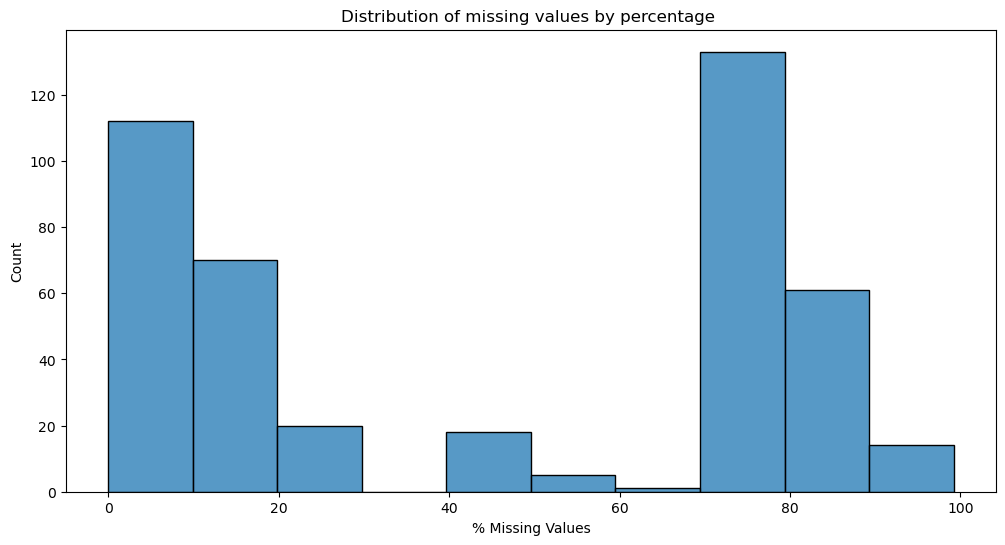

In [14]:
plt.figure(figsize= (12,6))
s = sns.histplot(col_prop_trn['perc_null'])
s.set_title('Distribution of missing values by percentage ')
s.set(xlabel = '% Missing Values')
plt.show()

ada 115 kolom yang hilang dalam nilai rentang 0 - 10%<br>
dan ada 125 kolom nilai yang hilang 70 - 80% 

In [15]:
def get_target_dist(train):
    df = train.groupby('isFraud').agg({'isFraud': 'count'})
    df.columns = ['count']
    df['percent'] = df['count'] * 100 / df['count'].sum()
    df['percent'] = df['percent'].round(2)
    return df

# Panggil fungsi dan hitung distribusi target
target_dist = get_target_dist(train)
print(target_dist)

          count  percent
isFraud                 
0        569877     96.5
1         20663      3.5


# Categorical Columns

In [16]:
#mengambil kolom-kolom penting dari file transaksi
cat_cols = ['DeviceType', 'DeviceInfo', 'ProductCD', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain']
#menggabungkan kolom M1 - M9
cat_cols +=  ['M' + str(i) for i in range(1,10)]

#menggabungkan kolom card1 - card9
cat_cols += ['card' + str(i) for i in range(1,7)]

#menggabungkan kolom id12 to id38 
cat_cols += ['id_' + str(i) for i in range(12,39)]

#menggunakan fungsi column_properties untuk menganalisis nilai null dan non null
column_properties(train[cat_cols]).T

column,DeviceType,DeviceInfo,ProductCD,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,card1,card2,card3,card4,card5,card6,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
count_non_null,140810,118666,590540,524834,524834,496084,137291,319440,319440,319440,309096,240058,421180,244275,244288,244288,590540,581607,588975,588963,586281,588969,144233,127320,80044,140985,129340,139369,45113,139318,139261,5159,5169,5169,4747,5132,5163,5169,140978,140978,77565,140282,77586,73289,77805,140985,140985,140985,140985
count_null,449730,471874,0,65706,65706,94456,453249,271100,271100,271100,281444,350482,169360,346265,346252,346252,0,8933,1565,1577,4259,1571,446307,463220,510496,449555,461200,451171,545427,451222,451279,585381,585371,585371,585793,585408,585377,585371,449562,449562,512975,450258,512954,517251,512735,449555,449555,449555,449555
perc_null,76.155722,79.90551,0.0,11.126427,11.126427,15.994852,76.751617,45.907136,45.907136,45.907136,47.658753,59.349409,28.678836,58.635317,58.633115,58.633115,0.0,1.512683,0.265012,0.267044,0.721204,0.266028,75.576083,78.440072,86.445626,76.126088,78.098012,76.399736,92.360721,76.408372,76.418024,99.126393,99.124699,99.124699,99.196159,99.130965,99.125715,99.124699,76.127273,76.127273,86.865411,76.245132,86.861855,87.589494,86.824771,76.126088,76.126088,76.126088,76.126088
count_unique,2,1786,5,332,74,59,60,2,2,2,3,2,2,2,2,2,13553,500,114,4,119,4,2,54,25,3,2,104,18,522,394,490,25,3,12,341,95,2,2,2,75,130,4,260,4,2,2,2,2
dtype,object,object,object,float64,float64,object,object,object,object,object,object,object,object,object,object,object,int64,float64,float64,object,float64,object,object,float64,float64,object,object,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,object,object,object,object,object,float64,object,object,object,object,object,object


In [17]:
train[cat_cols].head()

,DeviceType,DeviceInfo,ProductCD,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,card1,card2,card3,card4,card5,card6,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
0,NaN,NaN,W,315.0,87.0,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN,13926,NaN,150.0,discover,142.0,credit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,W,325.0,87.0,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,2755,404.0,150.0,mastercard,102.0,credit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,W,330.0,87.0,outlook.com,NaN,T,T,T,M0,F,F,F,F,F,4663,490.0,150.0,visa,166.0,debit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,W,476.0,87.0,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,18132,567.0,150.0,mastercard,117.0,debit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mobile,SAMSUNG SM-G892A Build/NRD90M,H,420.0,87.0,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4497,514.0,150.0,mastercard,102.0,credit,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T


# Numeric Columns

In [18]:
#emasukkan semua kolom train ke dalam daftar
all_cols = train.columns.tolist()
num_cols = [x for x in all_cols if x not in cat_cols]

num_cols.remove('TransactionID')
num_cols.remove('isFraud')
train[num_cols].describe()

,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,...,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11
count,5.905400e+05,590540.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,...,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,140978.000000
mean,7.372311e+06,135.027176,118.502180,231.855423,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215,94.347568,169.563231,28.343348,140.002441,42.335965,69.805717,41.638950,146.058108,0.561057,123.982137,146.621465,54.037533,17.901295,57.724444,163.744579,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.072870,1.027704,1.041529,0.463915,0.478987,0.559711,0.599166,0.999500,0.122342,0.123460,0.134040,...,0.052002,0.251761,0.283140,0.264208,1.000007,139.748713,408.682375,230.413180,10.995986,118.195658,4.202175,39.173910,21.351473,43.319174,26.806977,109.818544,247.606741,162.153398,18.372476,42.073133,28.326584,6.220289,13.103775,9.184612,0.058494,0.851040,0.296633,0.336790,1.312844,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,99.745325
std,4.617224e+06,239.162522,371.872026,529.053494,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262,157.660387,177.315865,62.384721,191.096774,89.000144,143.669253,99.743264,231.663840,0.316880,182.615225,186.042622,124.274558,67.614425,136.312450,202.726660,0.007390,0.240133,0.320890,0.440053,0.475902,0.239385,0.304779,0.186069,0.226339,0.521522,0.552431,0.510533,0.532185,0.022345,0.332422,0.342841,0.364456,...,0.318310,0.481889,0.623608,0.528238,0.002603,2348.849634,4391.992977,3021.924247,116.254277,352.983093,102.374938,172.128339,95.902970,173.619028,116.853222,2270.033202,3980.042828,2793.343636,332.304848,473.499307,382.053171,56.022561,106.739813,73.627893,0.304415,3.950295,1.364356,1.580144,8.769083,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,1.127602
min,8.640000e+04,0.251000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

# Data Pre-Processing
1. Satukan set data tranining dan set data uji dengan menambahkan . Hal ini dilakukan agar kita dapat menerapkan langkah-langkah pra-pemrosesan pada himpunan gabungan.<br>
2. Mengonversi fitur kategorikal dari string ke int menggunakan pengkodean ordinal. Misalnya mengonversi ['A', 'B'. 'C'] menjadi [1,2,3]<br>
3. Buat sub dataframe untuk submission nilai tes, nantinya akan kita isi dengan prediksi pada test set

In [19]:
# melakukan langkah-langkah pra-pemrosesan ke set gabungan
data_all = train.append(test, ignore_index = True, sort=False)

# Lakukan pengkodean ordinal untuk fitur kategorikal
for col in cat_cols:
    #mengonversi fitur kategorikal dari string ke int
    data_all[col], uniques = pd.factorize(data_all[col])
    #pemfaktoran menetapkan nilai nol menjadi -1, jadi ubahlah kembali menjadi NaN
    data_all[col] = data_all[col].replace(-1, np.nan)
    
#Membuat dataframe
sub = pd.DataFrame()
sub['TransactionID'] = test.TransactionID


del train, test
gc.collect()

C:\Users\DimasRN\AppData\Local\Temp\ipykernel_388\422223914.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all = train.append(test, ignore_index = True, sort=False)


0

# Create Test, Train and Validation sets
1. Dari kumpulan data gabungan, pisahkan kumpulan data pelatihan dan pengujian, serta pisahkan target dan fitur<br>
2. Pisahkan training set menjadi training set dan validation set. Kami akan menggunakan 80% data pertama sebagai set pelatihan dan 20% terakhir sebagai set validasi<br>

In [21]:
from sklearn.model_selection import train_test_split

#Untuk nilai target yang ditetapkan tes akan menjadi nol
X_train =  data_all[data_all['isFraud'].notnull()]
X_test  =  data_all[data_all['isFraud'].isnull()]

del data_all
gc.collect()

y_train = X_train['isFraud']

X_train = X_train.drop(['TransactionID', 'isFraud'], axis = 1)
X_test = X_test.drop(['TransactionID',   'isFraud'], axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, shuffle=False, 
                                                      random_state = 42)

print('Train shape{} Valid Shape{}, Test Shape {}'.format(X_train.shape, X_valid.shape, X_test.shape))

Train shape(472432, 432) Valid Shape(118108, 432), Test Shape (506691, 432)


In [22]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid  = lgb.Dataset(X_valid, y_valid)
#Kami berlatih sampai skor validasi tidak meningkat selama 200 putaran
early_stopping_rounds = 200
lgb_results = {}

params = {}

params['learning_rate'] = 0.06
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['seed'] =  42
params['metric'] =    'auc'
#is_unbalance diatur ke True untuk menangani sifat set data yang tidak seimbang
params['is_unbalance'] = True
#melatih 80% pertama dari dataset
params['bagging_fraction'] = 0.8
params['bagging_freq'] = 1
params['feature_fraction'] = 0.8
params['max_bin'] = 127

model = lgb.train(params,
                  lgb_train,
                  num_boost_round = 10000,
                  valid_sets =  [lgb_train,lgb_valid],
                  early_stopping_rounds = early_stopping_rounds,                    
                  evals_result = lgb_results,
                  verbose_eval = 100
                   )


y_pred_test = model.predict(X_test)
sub['isFraud'] = y_pred_test
sub.to_csv('lgb_sub.csv', index=False)

C:\Users\DimasRN\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\DimasRN\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\DimasRN\anaconda3\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument i

[LightGBM] [Info] Number of positive: 16599, number of negative: 455833
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.602914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21430
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 431
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.035135 -> initscore=-3.312784
[LightGBM] [Info] Start training from score -3.312784
Training until validation scores don't improve for 200 rounds
[100]	training's auc: 0.937226	valid_1's auc: 0.90051
[200]	training's auc: 0.955705	valid_1's auc: 0.909725
[300]	training's auc: 0.967115	valid_1's auc: 0.914767
[400]	training's auc: 0.974491	valid_1's auc: 0.915976
[500]	training's auc: 0.979714	valid_1's auc: 0.916881
[600]	training's auc: 0.983722	valid_1's auc: 0.91635
[700]	training's auc: 0.986802	valid_1's auc: 0.916524
Early stopping, best iteration is:
[508]	training's au

In [23]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

#we display the results
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score, precision_score, recall_score,confusion_matrix

def validation_results(y_valid, y_prob, verbose = True):   
    #empty list of scores
    scores = {}                      
    y_pred_class =  [0  if x < 0.5 else 1 for x in y_prob]
    #for the accuracy score
    scores['val_accuracy']  = accuracy_score(y_valid, y_pred_class)
    #for ROC AUC score
    scores['val_auc']       = roc_auc_score(y_valid, y_prob)
    #for the F1 score
    scores['val_f1']        =   f1_score(y_valid, y_pred_class, average = 'binary')
    #For precision score
    scores['val_precision'] = precision_score(y_valid, y_pred_class)
    #for recal score
    scores['val_recall']    = recall_score(y_valid, y_pred_class)
    
    cm = confusion_matrix(y_valid, y_pred_class)
    cm_df = pd.DataFrame(cm, columns=np.unique(y_valid), index = np.unique(y_valid))
    #pritnting the scores
    if verbose:
        print('\nValidation Accuracy      {:0.5f}'.format( scores['val_accuracy'] ))
        print('Validation   AUC         {:0.5f}'.format( scores['val_auc']   ))
        print('Validation Precision     {:0.5f}'.format(scores['val_precision']))
        print('Validation Recall        {:0.5f}'.format(scores['val_recall']))
        print('Validation  F1           %0.5f' %scores['val_f1'] )
    return scores , cm_df


In [24]:
y_prob = model.predict(X_valid)
results, cm_df = validation_results(y_valid, y_prob, verbose = True)


Validation Accuracy      0.91726
Validation   AUC         0.91694
Validation Precision     0.25473
Validation Recall        0.72933
Validation  F1           0.37758


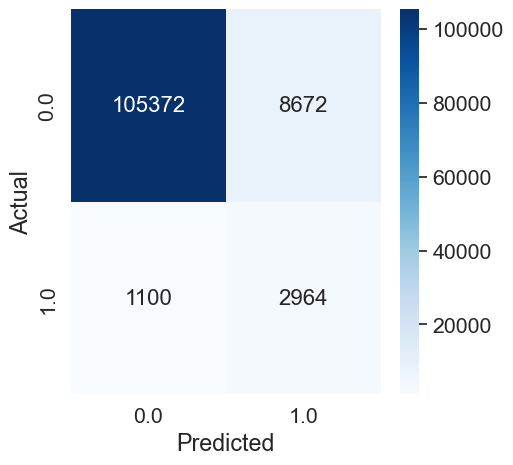

In [25]:
#confusion matrix
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)
sns.heatmap(cm_df, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='g')
plt.show()

In [26]:
#plot training scores and validation scores
def plot_lgb_scores(lgb_results):
    train_res = lgb_results['training']['auc']
    valid_res = lgb_results['valid_1']['auc']
    ntrees = range(1, len(train_res) + 1)

    plt.figure(figsize = (12, 6))
    plt.plot(ntrees, train_res , 'b', label = 'Training')
    plt.plot(ntrees, valid_res, 'r', label = 'Validation')
    plt.xlabel('Number of Trees', fontsize = 14)
    plt.ylabel('AUC Score', fontsize = 14)
    plt.legend(fontsize = 14)
    plt.show()

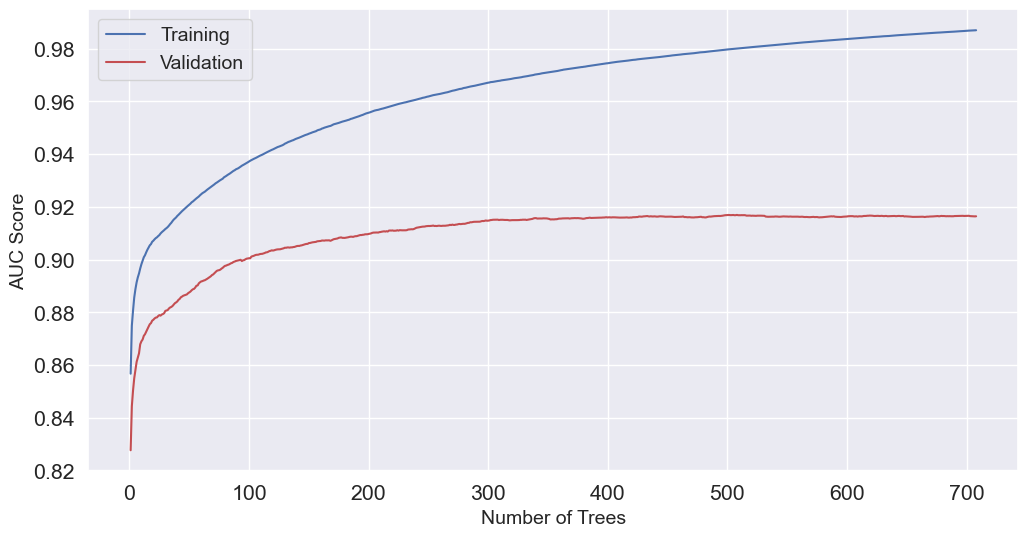

In [27]:
plot_lgb_scores(lgb_results)

In [28]:
#top 20 features
def plot_feature_imp(model, top_n = 30):
    feature_imp = pd.DataFrame()
    feature_imp['feature'] = model.feature_name()
    feature_imp['importance']  = model.feature_importance()
    feature_imp = feature_imp.sort_values(['importance'], ascending = False)
    feature_imp_disp = feature_imp.head(top_n)
    plt.figure(figsize=(10, 12))
    sns.barplot(x="importance", y="feature", data=feature_imp_disp)
    plt.title('LightGBM Features')
    plt.show() 


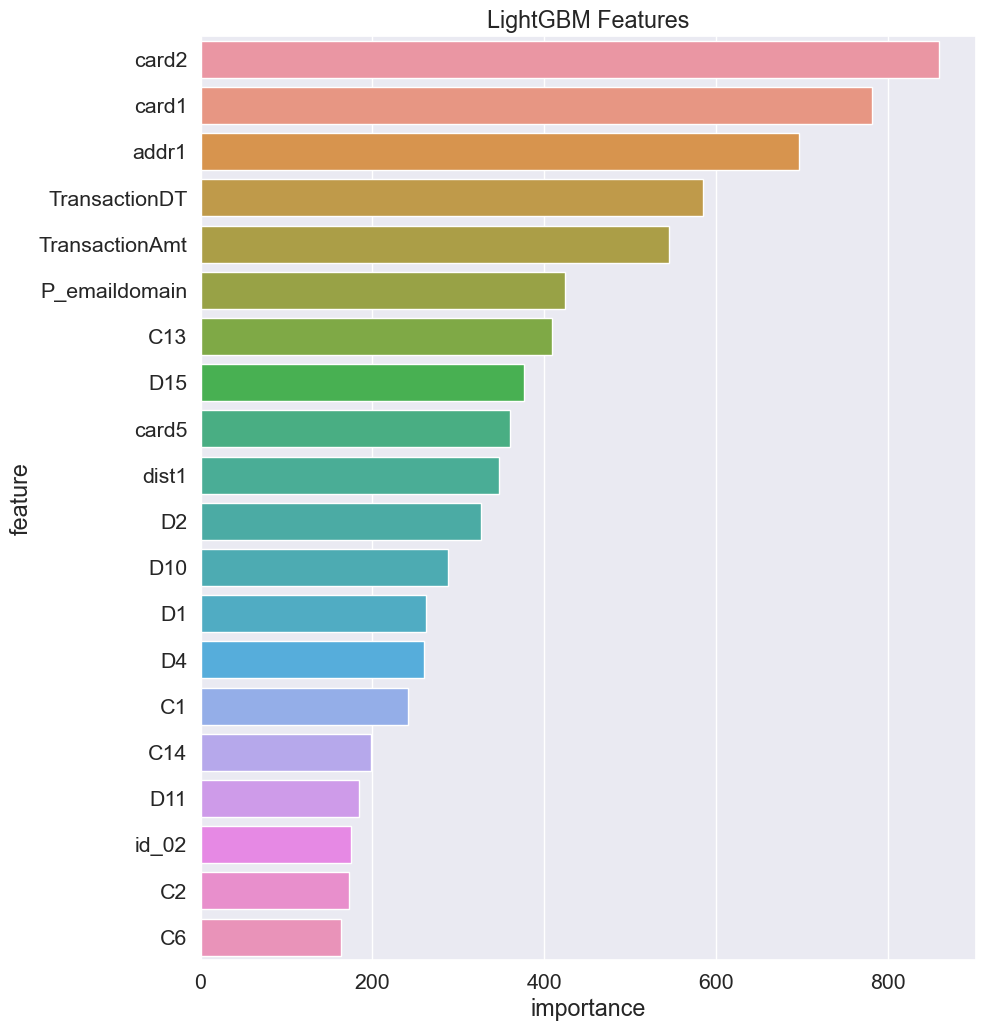

In [29]:
plot_feature_imp(model, top_n = 20)

In [45]:
y_prob_test = model.predict(X_test)
sub['isFraud'] = y_prob_test
sub.to_csv('submission.csv', index=False)
sub.tail()

,TransactionID,isFraud
506686,4170235,0.245004
506687,4170236,0.115802
506688,4170237,0.151864
506689,4170238,0.139875
506690,4170239,0.125116


In [31]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix

# # Fungsi untuk hasil validasi
# def validation_results(y_valid, y_prob, verbose=True):
#     # Empty list of scores
#     scores = {}
#     y_pred_class = [0 if x < 0.5 else 1 for x in y_prob]
    
#     # Accuracy score
#     scores['val_accuracy'] = accuracy_score(y_valid, y_pred_class)
#     # ROC AUC score
#     scores['val_auc'] = roc_auc_score(y_valid, y_prob)
#     # F1 score
#     scores['val_f1'] = f1_score(y_valid, y_pred_class, average='binary')
#     # Precision score
#     scores['val_precision'] = precision_score(y_valid, y_pred_class)
#     # Recall score
#     scores['val_recall'] = recall_score(y_valid, y_pred_class)

#     cm = confusion_matrix(y_valid, y_pred_class)
#     cm_df = pd.DataFrame(cm, columns=np.unique(y_valid), index=np.unique(y_valid))

#     # Printing the scores
#     if verbose:
#         print('\nValidation Accuracy      {:0.5f}'.format(scores['val_accuracy']))
#         print('Validation   AUC         {:0.5f}'.format(scores['val_auc']))
#         print('Validation Precision     {:0.5f}'.format(scores['val_precision']))
#         print('Validation Recall        {:0.5f}'.format(scores['val_recall']))
#         print('Validation  F1           %0.5f' % scores['val_f1'])

#     return scores, cm_df

# # Assuming you have already trained an XGBoost model
# y_prob = model.predict(X_valid)  # dtest should be your XGBoost test data
# results, cm_df = validation_results(y_valid, y_prob, verbose=True)
